In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import sklearn

In [2]:
df=pd.read_csv('/content/breast-cancer (1).csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [4]:
df=df.drop(['Unnamed: 32','id'],axis=1)

In [5]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0}).astype(int)

In [8]:
df.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
263,1,15.61,19.38,100.00,758.6,0.07840,0.05616,0.04209,0.02847,0.1547,...,17.91,31.67,115.90,988.6,0.1084,0.1807,0.2260,0.08568,0.2683,0.06829
213,1,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,...,18.07,28.07,120.40,1021.0,0.1243,0.1793,0.2803,0.10990,0.1603,0.06818
534,0,10.96,17.62,70.79,365.6,0.09687,0.09752,0.05263,0.02788,0.1619,...,11.62,26.51,76.43,407.5,0.1428,0.2510,0.2123,0.09861,0.2289,0.08278
472,0,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.1065,0.2791,0.3151,0.11470,0.2688,0.08273
162,1,19.59,18.15,130.70,1214.0,0.11200,0.16660,0.25080,0.12860,0.2027,...,26.73,26.39,174.90,2232.0,0.1438,0.3846,0.6810,0.22470,0.3643,0.09223
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.22160,0.2060,0.07115
254,1,19.45,19.33,126.50,1169.0,0.10350,0.11880,0.13790,0.08591,0.1776,...,25.70,24.57,163.10,1972.0,0.1497,0.3161,0.4317,0.19990,0.3379,0.08950
533,1,20.47,20.67,134.70,1299.0,0.09156,0.13130,0.15230,0.10150,0.2166,...,23.23,27.15,152.00,1645.0,0.1097,0.2534,0.3092,0.16130,0.3220,0.06386
540,0,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134
39,1,13.48,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.05439,0.1720,...,15.53,26.02,107.30,740.4,0.1610,0.4225,0.5030,0.22580,0.2807,0.10710


In [10]:
X=df.iloc[:,1:] # independent
y=df.iloc[:,0]#dependent

In [11]:
X.shape,y.shape

((569, 30), (569,))

In [18]:
train_ind = X.iloc[ : 500 , :]
val_ind = X.iloc[500 : 550 , :]
test_ind = X.iloc[550 : 569 , :]

train_dep = y.iloc[ : 500]
val_dep = y.iloc[500 : 550]
test_dep = y.iloc[550 : 569]

In [19]:
train_ind.shape

(500, 30)

In [20]:
val_ind.shape

(50, 30)

In [21]:
test_ind.shape

(19, 30)

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.activations  import relu,sigmoid

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
model=Sequential()  #class >object
model.add(Dense(units=128,kernel_initializer='he_uniform',activation='relu',input_dim=train_ind.shape[1]))
model.add(Dense(units=64,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=8,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=4,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=2,kernel_initializer='glorot_uniform',activation='relu'))
model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [36]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,617 (57.10 KB)

 Trainable params: 14,617 (57.10 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer='adam',loss= 'binary_crossentropy', metrics=['Accuracy'])

In [38]:
model.fit(train_ind,train_dep,batch_size=50,epochs=50,validation_data=(val_ind,val_dep
                                                                       ))

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - Accuracy: 0.5951 - loss: 23.5760 - val_Accuracy: 0.7200 - val_loss: 1.3920
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Accuracy: 0.3597 - loss: 1.8221 - val_Accuracy: 0.3800 - val_loss: 0.6693
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Accuracy: 0.6270 - loss: 0.7157 - val_Accuracy: 0.8000 - val_loss: 0.6337
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - Accuracy: 0.6031 - loss: 0.6768 - val_Accuracy: 0.7600 - val_loss: 0.6086
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Accuracy: 0.7076 - loss: 0.6300 - val_Accuracy: 0.8200 - val_loss: 0.5742
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Accuracy: 0.8279 - loss: 0.5933 - val_Accuracy: 0.8400 - val_loss: 0.5873
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Accuracy: 0.8190 - loss: 0.6059 - val_Accuracy: 0.8600 - val_loss: 0.5518
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Accuracy: 0.8688 - loss: 0.5693 - val_Accuracy: 0.8600 - val_lo

In [42]:
model.history.history['Accuracy']

[0.6039999723434448,
 0.335999995470047,
 0.6259999871253967,
 0.5979999899864197,
 0.7599999904632568,
 0.8140000104904175,
 0.8299999833106995,
 0.8479999899864197,
 0.8579999804496765,
 0.8700000047683716,
 0.878000020980835,
 0.878000020980835,
 0.9039999842643738,
 0.8980000019073486,
 0.8859999775886536,
 0.8999999761581421,
 0.9079999923706055,
 0.9020000100135803,
 0.9039999842643738,
 0.8880000114440918,
 0.906000018119812,
 0.8960000276565552,
 0.9120000004768372,
 0.9100000262260437,
 0.8859999775886536,
 0.9139999747276306,
 0.9079999923706055,
 0.9020000100135803,
 0.9120000004768372,
 0.9100000262260437,
 0.9179999828338623,
 0.9100000262260437,
 0.8920000195503235,
 0.9160000085830688,
 0.9240000247955322,
 0.9139999747276306,
 0.9139999747276306,
 0.9179999828338623,
 0.8899999856948853,
 0.8999999761581421,
 0.9160000085830688,
 0.9079999923706055,
 0.9179999828338623,
 0.9200000166893005,
 0.9020000100135803,
 0.9079999923706055,
 0.8980000019073486,
 0.89999997615814

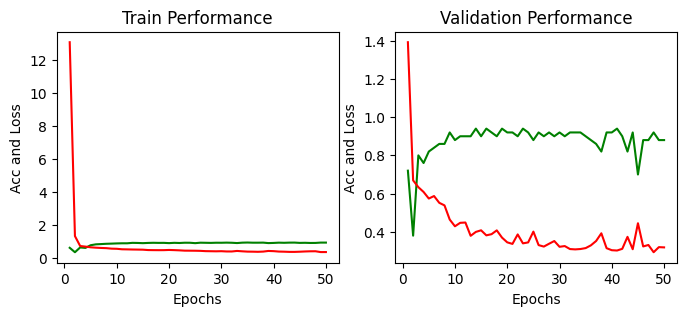

In [45]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
plt.title('Train Performance')
plt.xlabel('Epochs')
plt.ylabel('Acc and Loss')
plt.plot(np.arange(1,51),model.history.history['Accuracy'],color='g',label='Train ACC')
plt.plot(np.arange(1,51),model.history.history['loss'],color='r',label='Train loss')


plt.subplot(1,2,2)
plt.title('Validation Performance')
plt.xlabel('Epochs')
plt.ylabel('Acc and Loss')
plt.plot(np.arange(1,51),model.history.history['val_Accuracy'],color='g',label='val ACC')
plt.plot(np.arange(1,51),model.history.history['val_loss'],color='r',label='val loss')

plt.show()

In [53]:
#test
test_dep.shape

(19,)

In [54]:
first_row_data=[]
for i in test_ind.columns:
  first_row_data.append(test_ind[i][550])

In [55]:
len(first_row_data)

30

In [56]:
first_row_data

[np.float64(10.86),
 np.float64(21.48),
 np.float64(68.51),
 np.float64(360.5),
 np.float64(0.07431),
 np.float64(0.04227),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.1661),
 np.float64(0.05948),
 np.float64(0.3163),
 np.float64(1.304),
 np.float64(2.115),
 np.float64(20.67),
 np.float64(0.009579),
 np.float64(0.01104),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.03004),
 np.float64(0.002228),
 np.float64(11.66),
 np.float64(24.77),
 np.float64(74.08),
 np.float64(412.3),
 np.float64(0.1001),
 np.float64(0.07348),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.2458),
 np.float64(0.06592)]

In [57]:
test_dep[550]

np.int64(0)

In [58]:
f=np.array(first_row_data).reshape(1,-1)
f

array([[1.086e+01, 2.148e+01, 6.851e+01, 3.605e+02, 7.431e-02, 4.227e-02,
        0.000e+00, 0.000e+00, 1.661e-01, 5.948e-02, 3.163e-01, 1.304e+00,
        2.115e+00, 2.067e+01, 9.579e-03, 1.104e-02, 0.000e+00, 0.000e+00,
        3.004e-02, 2.228e-03, 1.166e+01, 2.477e+01, 7.408e+01, 4.123e+02,
        1.001e-01, 7.348e-02, 0.000e+00, 0.000e+00, 2.458e-01, 6.592e-02]])

In [59]:
if model.predict(f)[0][0] > 0.5:
  print(f'Malignin : {1}')
else:
  print(f'Benin : {0}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Benin : 0


In [60]:
sols=model.predict(test_ind)
c=[]
for i in sols:
  if i[0]>0.5:
    c.append(1)
  else:
    c.append(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


In [64]:
c

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0]

In [63]:
test_dep

,diagnosis
550,0
551,0
552,0
553,0
554,0
555,0
556,0
557,0
558,0
559,0


In [66]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [67]:
confusion_matrix(test_dep,c)

array([[13,  0],
       [ 1,  5]])

In [68]:
accuracy_score(test_dep,c)

0.9473684210526315

In [69]:
print(classification_report(test_dep,c))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.83      0.91         6

    accuracy                           0.95        19
   macro avg       0.96      0.92      0.94        19
weighted avg       0.95      0.95      0.95        19

